# Project: Wrangling and Analyze Data

In [1]:
#Importing useful libraries and modules

from sqlalchemy import create_engine
import requests 
import json 
import tweepy as twp
import numpy as np
import pandas as pd
import os
import sys

import matplotlib.pyplot as plt                                      
plt.rc("font", size=14)
%matplotlib inline

from matplotlib import cm as cm


import seaborn as sns                                                
sns.set(style="whitegrid", color_codes=True)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# twar ~~ twitter archive
directoryname = ''
twar_df = pd.read_csv(directoryname)

twar_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twar_df.shape[0]

2356

In [4]:
print(twar_df.duplicated().sum())

print(twar_df.tweet_id.duplicated().sum())

0
0


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#Link copied from udacity website -> classroom
providedlink = ''
url = providedlink

#Because i work localy , i already made a folder for gathering content !
folder_name = 'gathering files'

#In this line of code , webpage is saved in response 
response = requests.get(url)

#Making sure response saved correctly ... Http response 200 == 'OK'
print(response)


#by using os library, in this line of code i saved the content (image-predictions.tsv) in a specific folder !
try:
    
    with open(os.path.join(folder_name , url.split('/')[-1]) , mode = 'wb') as file:
        file.write(response.content)

except OSError as error : 
    print(error) 

<Response [200]>


In [6]:
# checking !
os.listdir(folder_name)

['image-predictions.tsv', 'tweet-json.txt', 'twitter-archive-enhanced.csv']

In [7]:
# impr ~~ image prediction
directoryname = ''
impr_df = pd.read_csv(directoryname , sep = '\t')

impr_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
impr_df.shape[0]

2075

In [9]:
print(impr_df.duplicated().sum())

print(impr_df.tweet_id.duplicated().sum())

0
0


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
#Since i couldn't obtain developer account on twitter, i am going to use the alternative option by downloading the following files !
url_link1 = ''
url_link2 = ''

url_list = [url_link1 , url_link2 ]



In [11]:
try:
    
    for link in url_list:
        
        response1 = requests.get(link)
        print(response1)
        
    with open(os.path.join(folder_name , link.split('/')[-1]) , mode = 'wb') as file:
        file.write(response1.content)
        

except OSError as error : 
    print(error) 

<Response [200]>
<Response [200]>


In [12]:
#For some reason , i am not able to download the 'py' file programmatically
os.listdir(folder_name)

['image-predictions.tsv', 'tweet-json.txt', 'twitter-archive-enhanced.csv']

In [13]:
directoryname = ''
file_name = directoryname
#Since the text file already structured as json we can use the following
df_info = pd.read_json(file_name,lines=True)

cols_to_keep = ['id' , 'retweet_count' , 'favorite_count']

#new version of pandas allows to specify columns to keep by using reindex()
df_info = df_info.reindex(cols_to_keep, axis='columns')

df_info.head()



,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Twitter archive !

In [14]:
#Let's start with tweeter archive dataframe !

#visual assessment
twar_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1926,674053186244734976,NaN,NaN,2015-12-08 02:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186...,10,10,Stanley,None,None,None,None
2022,672068090318987265,NaN,NaN,2015-12-02 15:01:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's upset because he's no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672068090...,7,10,Gizmo,None,None,None,None
1992,672614745925664768,NaN,NaN,2015-12-04 03:13:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Norman. Doesn't bark much. Very docile...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672614745...,6,10,Norman,None,None,pupper,None
1765,678410210315247616,NaN,NaN,2015-12-20 03:02:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jerome. He can shoot french fries...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678410210...,10,10,Jerome,None,None,None,None
266,841833993020538882,NaN,NaN,2017-03-15 02:10:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ken. His cheeks are mag...,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,None,None,None,None
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
1483,693262851218264065,NaN,NaN,2016-01-30 02:41:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope you guys enjoy this beautiful snowy pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693262851...,11,10,None,None,None,pupper,None
358,830097400375152640,NaN,NaN,2017-02-10 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,NaN,NaN,NaN,"https://www.gofundme.com/sick-baby-samson,http...",13,10,Samson,None,None,None,None
1126,729854734790754305,NaN,NaN,2016-05-10 02:05:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ollie. He conducts this train. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729854734...,11,10,Ollie,None,None,None,None
467,817120970343411712,NaN,NaN,2017-01-05 21:29:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Name a more iconic quartet... I'll wait. 13/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817120970...,13,10,None,None,None,None,None


In [15]:
# overview of dataframe , programmatic assessment

twar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### ==================================================================================

As we can see , timestamp data type should be 'datetime' instead of object(Str)

#### ==================================================================================

In [16]:
#Let's check if there are duplicated rows or not in general

twar_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### ==================================================================================

As we can see above, there are some columns that has a high number of null values


#### ==================================================================================

In [17]:
#In this cell rows and specific columns checked if duplicates exists or not !

print('number of duplicated rows :' , twar_df.duplicated().sum() , '\n')

print('number of duplication in tweet_id column:' , twar_df['tweet_id'].duplicated().sum())

twar_df.nunique()

number of duplicated rows : 0 

number of duplication in tweet_id column: 0


tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64


#### ==================================================================================

It it odd for the last 4 columns to have only 2 unique values !


#### ==================================================================================

In [18]:
twar_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### ==================================================================================

rating_numerator and rating_denominator max values both look suspicious 

#### ==================================================================================


In [19]:
list(twar_df['name']).count('None')

745

#### ==================================================================================

This resolves in lack of standarization of specifying, instead it should be "NaaN"

#### ==================================================================================

In [20]:
#In this cell, i am trying to find unreliable values 

twar_df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [21]:
#In this cell, i am trying to find unreliable values 

twar_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [22]:
twar_df[(twar_df['rating_numerator'] == 1776) | (twar_df['rating_numerator'] == 204) ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


### Quality issues

1.**visual assessment**:"Dog types" --> (doggo , floofer , etc..) documents 'NaaN' as 'None' which which resolve in lack of standarization 


2.**programmatic assessment**: "timestamp"  data type should be 'datetime' instead of OBJECT

3.**programmatic assessment**: "tweet_id/id" should be Object instead of integer/float, since no mathematical operations are done on these columns !


4.**programmatic assessment**: "Names" documents 'NaaN' as 'None' which which resolve in lack of standarization 


5.**programmatic assessment**: Nominator and denominator has unreliable ratings such as 1776 , 177 and 0


6.**programmatic assessment**: Source may be reduced by replacing the device type itself instead of a link

7.**programmatic assessment**: Name column have invalid names such as ('a' , 'the' , 'an' , 'not' , 'such' , '0' , 'all' , 'just' and 'by')

8.**programmatic assessment**: row 313 has invalid rating 960/0 the correct rating is 13/10 (This was possible by using a text editor)

9.**programmatic assessment**: Change datatype of "rating_numerator" and "rating_denominator" from int to FLOAT since some values are in float

10.**visual assessment**: some dogs have two styles by mistake (After fecthing visually through text editors !)

### Tidiness issues
1.The three dataframes could possibly be merged into one master dataframe on "tweet_id" (integration) to conclude a better assessment and analysis

2.There are multiple columns of Dog stages, hence we should find a way to merge all these columns into single column.

3.Drop 'in_reply_to_status_id' , 'in_reply_to_user_id' ,'retweeted_status_id','retweeted_status_user_id' ,'retweeted_status_timestamp' since i am not going to use them

## df_Info (Information of each tweet)

In [23]:
df_info.sample(20)

,id,retweet_count,favorite_count
1494,692530551048294401,474,2021
742,780459368902959104,1224,5892
325,833826103416520705,3904,16728
170,858860390427611136,8805,0
1051,742465774154047488,4382,7916
259,842892208864923648,56625,0
1386,700462010979500032,2031,4537
30,886258384151887873,6523,28469
1218,714606013974974464,1038,3938
401,824325613288833024,11848,12999


In [24]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
df_info.duplicated().sum()

0

In [26]:
df_info.id.duplicated().sum()

0

In [27]:
df_info[(df_info['retweet_count'] == 0) & (df_info['favorite_count'] == 0)]

,id,retweet_count,favorite_count


### Quality issues
1.programmatic assessment: id should be OBJECT instead of int

2.visual assessment: column "id" should be renamed to tweet_id to match other tables and achieve standarizaion

### Tidiness issues
1.After renaming column 'id' to 'tweet_id', we should merge it to twar_df to achieve integration !

## impr_df (image-predictions)

In [28]:
#in this cell, we are going to skim through a sample
impr_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
615,680176173301628928,https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg,1,Christmas_stocking,0.207547,False,mask,0.193880,False,feather_boa,0.152738,False
743,687476254459715584,https://pbs.twimg.com/media/CYpoAZTWEAA6vDs.jpg,1,wood_rabbit,0.702725,False,Angora,0.190659,False,hare,0.105072,False
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
2042,885528943205470208,https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg,1,pug,0.369275,True,Labrador_retriever,0.265835,True,kuvasz,0.134697,True
1101,720785406564900865,https://pbs.twimg.com/media/CgC-gMCWcAAawUE.jpg,1,Chihuahua,0.896422,True,dingo,0.027929,False,kelpie,0.017916,True


In [29]:
impr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
#in this cell, we can see that number of unique jpq_url is less than the total number of rows !
impr_df.jpg_url.nunique()

2009

In [31]:
impr_df[(impr_df.jpg_url.duplicated()) & (impr_df['img_num'].duplicated())]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


### Quality issues
1.programmatic assessment:only 2075 tweet_Id have images but 'twar_df' have 2356 rows

2.programmatic assessment: Change data type of tweet_id from int to Object

### Tidiness issues
1.combine all three dataframes

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
twar_df_copy = twar_df.copy()
impr_df_copy = impr_df.copy()
df_info_copy = df_info.copy()

In [33]:
twar_df_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [34]:
impr_df_copy.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [35]:
df_info_copy.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467


==================================================================================================================
### Legend: 
    1- (number of dataframe) / (number of issue assoicated with) 
    2- I am going to address quality issue then tideness


### Twitter Archive: "twar_df_copy"



### 1/1:

#### Define: Achieve standarization by replacing "None" with "NaN" on Dog stages

In [36]:
twar_df_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Code

In [37]:
#In this cell , df.loc is used by providing conditions and specify certain columns
twar_df_copy.loc[(twar_df_copy.doggo == 'None' ) | (twar_df_copy.floofer == 'None' ) | (twar_df_copy.pupper == 'None' ) | (twar_df_copy.puppo == 'None' ) , ['doggo' , 'floofer' , 'pupper' , 'puppo']] = pd.NA

#### Test

In [38]:
twar_df_copy[['doggo' , 'floofer' , 'pupper' , 'puppo']]

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
2351,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaN


============================================================================================================
###  1/2:

#### Define: Change data type of "timestamp" and from Object to Datetime

#### Code

In [39]:
twar_df_copy['timestamp'] = pd.to_datetime(twar_df_copy['timestamp'])
twar_df_copy['retweeted_status_timestamp'] = pd.to_datetime(twar_df_copy['retweeted_status_timestamp'])

#### Test

In [40]:
twar_df_copy.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

============================================================================================================
### 1/3:

#### Define: Change datatypes of tweet_id  to OBJECT


#### Code:

In [41]:
twar_df_copy['tweet_id'] = twar_df_copy['tweet_id'].astype(str)

#### Test:

In [42]:
twar_df_copy.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

============================================================================================================

### 1/4:

#### Define:  Achieve standarization by replacing "None" with "NaN" on column : name

#### Code:

In [43]:
twar_df_copy.name.replace(pd.NA , np.nan , inplace = True)


#### Test:

In [44]:
twar_df_copy[['name']]

,name
0,Phineas
1,Tilly
2,Archie
3,Darla
4,Franklin
...,...
2351,None
2352,a
2353,a
2354,a


In [45]:
twar_df_copy[['name']].sample(20)

,name
495,Eleanor
593,Shadow
834,Chevy
1879,Moe
1854,a
1627,None
704,Rusty
817,Sebastian
1955,a
346,None


============================================================================================================

### 1/5:

#### Define: Remove outliers from numerator and denominator

#### Code:

In [46]:
twar_df_copy.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [47]:
# Numerator , let's calculate mean and detect a reilable range 

twar_df_copy.rating_numerator.mean()

13.12648556876061

In [48]:
rows = twar_df_copy[(twar_df_copy['rating_numerator'] > 1) & (twar_df_copy['rating_numerator'] < 14)].shape[0]
rows

2263

In [49]:
twar_df_copy.shape[0] - rows 

93

In [50]:
# Denominator , let's calculate mean and detect a reilable range 
twar_df_copy.rating_denominator.mean()

#It's realistic since ratings are out of 10

10.455432937181664

In [51]:
d_rows = twar_df_copy[(twar_df_copy['rating_denominator'] == 10)].shape[0]
d_rows

2333

In [52]:
twar_df_copy.shape[0] - d_rows 

23

#### Test:

# <span style = "color: red">  @Dog_rates is a dog rating twitter account that recieves pictures of dogs then provide  hilarious/funny feedback rating.</span> 


# <span style = "color: red"> I think it's ok to not change these outliers.</span> 
# <span style = "color: red"> as we can see the number of outliers that are above average numerator is 93 which is low !</span> 
# <span style = "color: red"> also there are only 23 values that do not equals '10' which is ok to leave as addressed above </span> 


============================================================================================================

### 1/6:

#### Define: Replace source with only device name rather than a whole link 

#### Code:

In [53]:
total = twar_df_copy.shape[0] - twar_df_copy.source.str.contains('iphone').sum()
total

135

In [54]:
# iphone , tweetdeck , twitter web client , Vine

twar_df_copy[(~twar_df_copy['source'].str.contains("iphone")) & (~twar_df_copy['source'].str.contains("tweetdeck")) & (~twar_df_copy['source'].str.contains("Twitter Web Client"))]['source'].iloc[0]

#I've started only with 'iphone' and moved on till 'twitter web client' 

'<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'

In [55]:
#Let's replace sources as we said !

twar_df_copy.loc[(twar_df_copy.source.str.contains('iphone')) , 'source'] = 'iphone'
twar_df_copy.loc[(twar_df_copy.source.str.contains('tweetdeck')) , 'source'] = 'tweetdeck'
twar_df_copy.loc[(twar_df_copy.source.str.contains('Twitter Web Client')) , 'source'] = 'twitter web client'
twar_df_copy.loc[(twar_df_copy.source.str.contains('Vine')) , 'source'] = 'vine'



In [56]:
twar_df_copy.source.value_counts()

iphone                2221
vine                    91
twitter web client      33
tweetdeck               11
Name: source, dtype: int64

### 1/7:

#### Define: replace names in Name column that have invalid names such as ('a' , 'the' , 'an' , 'not' , 'such' , '0' , 'all' , 'just' and 'by') with NaN

#### Code:

In [57]:
twar_df_copy.name =twar_df_copy.name.replace(['a' ,'the' , 'an' , 'not' ,'such' , '0' , 'all' , 'by' , 'just' ] , np.nan)

#### Test:

In [58]:
#seraching for the invalid names 
twar_df_copy[(twar_df_copy.name == 'a') |(twar_df_copy.name == 'the')|(twar_df_copy.name == 'an')|
               (twar_df_copy.name == 'not')|(twar_df_copy.name == 'such')| (twar_df_copy.name == '0')|
               (twar_df_copy.name == 'all')|(twar_df_copy.name == 'by')]



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## No invalid names founded :) 

### 1/8: 

#### Define: correct row 313 invalid rating '960/0'  with rating 13/10

#### Code:

In [59]:
#I like diversity, rather than using .loc i tried .at this time !
twar_df_copy.at[313 , 'rating_numerator'] = 13
twar_df_copy.at[313 , 'rating_denominator'] = 10

#### Test:

In [60]:
twar_df_copy.iloc[313]

tweet_id                                                     835246439529840640
in_reply_to_status_id                                               8.35246e+17
in_reply_to_user_id                                                 2.62596e+07
timestamp                                             2017-02-24 21:54:03+00:00
source                                                                   iphone
text                          @jonnysun @Lin_Manuel ok jomny I know you're e...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaT
expanded_urls                                                               NaN
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [61]:
listofindex = []
for element in twar_df_copy.text:
    if element == "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl.":
        print(1)
        break

============================================================================================================
### 1/9

#### Define: Change datatype of "rating_numerator" and "rating_denominator" from int to FLOAT

#### Code:

In [62]:
twar_df_copy['rating_numerator'] = twar_df_copy['rating_numerator'].astype(float)
twar_df_copy['rating_denominator'] = twar_df_copy['rating_denominator'].astype(float)


#### Test:

In [63]:
twar_df_copy.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
rating_numerator                          float64
rating_denominator                        float64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

============================================================================================================

### 1/10:

#### Define: replace dogs have two styles by mistake with NaN 

#### Code:

In [64]:
# Dog stages before replacing !
listofilocs = [191 , 200 , 575 , 705]

for _ in listofilocs:
    print(twar_df_copy.iloc[_])
    print('\n==================================================================\n')


tweet_id                                                     855851453814013952
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-04-22 18:31:02+00:00
source                                                                   iphone
text                          Here's a puppo participating in the #ScienceMa...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaT
expanded_urls                 https://twitter.com/dog_rates/status/855851453...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [65]:
#Let's apply the changes !
twar_df_copy.at[191 , 'doggo'] = np.nan
twar_df_copy.at[200 , 'doggo'] = np.nan
twar_df_copy.at[575 , 'doggo'] = np.nan
twar_df_copy.at[705 , 'pupper'] = np.nan


#### Test:

In [66]:
# let's test it out !
listofilocs = [191 , 200 , 575 , 705]

for _ in listofilocs:
    print(twar_df_copy.iloc[_])
    print('\n==================================================================\n')


tweet_id                                                     855851453814013952
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-04-22 18:31:02+00:00
source                                                                   iphone
text                          Here's a puppo participating in the #ScienceMa...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaT
expanded_urls                 https://twitter.com/dog_rates/status/855851453...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

============================================================================================================
### Tideness
### 1/1:

#### Define: Combine multiple dogs category columns into one column

#### Code:

In [67]:
twar_df_copy['dog_stage'] = twar_df_copy['text'].str.extract('(doggo|floofer|pupper|puppo)',expand=True)
twar_df_copy = twar_df_copy.drop(['doggo','floofer','pupper','puppo'], axis=1)
twar_df_copy['dog_stage'].fillna('None', inplace=True)

#### Test:

In [68]:
twar_df_copy.dog_stage.value_counts()


None       1957
pupper      265
doggo        93
puppo        37
floofer       4
Name: dog_stage, dtype: int64

### 1/2:

#### Define: Drop  'in_reply_to_status_id' , 'in_reply_to_user_id' ,'retweeted_status_id','retweeted_status_user_id' ,'retweeted_status_timestamp' 

#### Code:

In [69]:
twar_df_copy.drop(['in_reply_to_status_id' ,
                                                     'in_reply_to_user_id' ,
                                                     'retweeted_status_id',
                                                     'retweeted_status_user_id' ,
                                                     'retweeted_status_timestamp']  ,axis = 1,inplace = True)


#### Test:

In [70]:
twar_df_copy.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
dog_stage                          object
dtype: object

#### After cleaning and solving all quality problems, i will integrate(combine) all dataframes into one master dataframe to achieve the general tideness goal !

============================================================================================================

## Image_prediction dataframe ! (impr_df_copy)



    
  Note: **There is only one quality issue and one general tideness issue !**


### Quality:

#### Define:  Change datatype of tweet_id to Object

#### Code:

In [71]:
impr_df_copy['tweet_id'] = impr_df_copy['tweet_id'].astype(str)

#### Test:

In [72]:
impr_df_copy.tweet_id.dtypes

dtype('O')

============================================================================================================
## Tweet information dataframe ! (df_info_copy)

  Note: **There are two quality issues and one general tideness issue !**


### Quality:

### 3/1:

#### Define: Change the column name 'id' to 'tweet_id' 

#### Code:

In [73]:
df_info_copy.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test:

In [74]:
df_info_copy

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


============================================================================================================

### 3/2:

#### Define:  Change datatype of tweet_id to Object

#### Code:

In [75]:
df_info_copy['tweet_id'] = df_info_copy['tweet_id'].astype(str)

#### Test:

In [76]:
df_info_copy.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

# Retweet_count and favorite_count are integers not float ! :)

## Summary (cleaning):

Overall, we have 10 quality issues and 2 tideness issues all cleaned and solved.

one last thing to do before moving to the next phase is to the last tideness issue which is : combine all dataframes into one master dataframe !




### Tideness

#### Define: Gather all dataframes into one master dataframe

#### Code:

In [77]:
master_df = twar_df_copy.join(impr_df_copy.set_index('tweet_id'), on = 'tweet_id')
master_df = pd.merge(master_df, df_info_copy, how = 'inner', on = 'tweet_id')


In [78]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2354 non-null   object             
 1   timestamp           2354 non-null   datetime64[ns, UTC]
 2   source              2354 non-null   object             
 3   text                2354 non-null   object             
 4   expanded_urls       2295 non-null   object             
 5   rating_numerator    2354 non-null   float64            
 6   rating_denominator  2354 non-null   float64            
 7   name                2275 non-null   object             
 8   dog_stage           2354 non-null   object             
 9   jpg_url             2073 non-null   object             
 10  img_num             2073 non-null   float64            
 11  p1                  2073 non-null   object             
 12  p1_conf             2073 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [79]:
master_df.to_csv('twitter_archive_master.csv' , encoding = 'utf-8' , index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [80]:
# dr stands for dog rates
dr_archive = pd.read_csv('twitter_archive_master.csv')

### Insights:
1. What dog stage gained the most favorite / retweets counts the most ?

2. What's the most appeared amoung dog stage  ?

3. According to the three algorithms, what is the top 3 dog types ?  

In [81]:
dr_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

### Visualization

## 1. What dog stage gained the most favorite / retweets counts the most ? 

### Dog stage / favorites

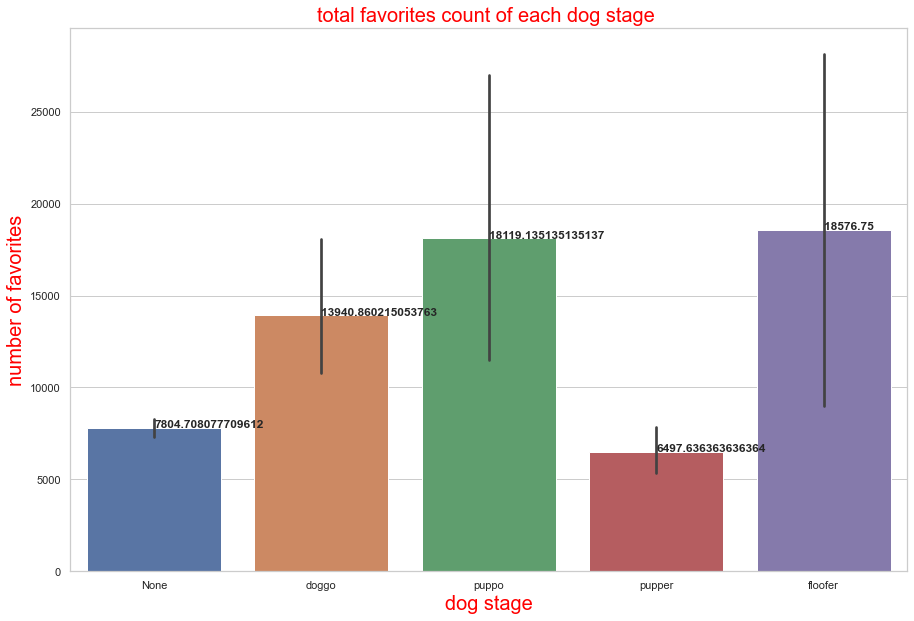

In [95]:
bar , ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data = dr_archive , x  = dr_archive['dog_stage'] , y = dr_archive['favorite_count']  )
plt.xlabel('dog stage', size = 20 , color = 'red' )
plt.ylabel('number of favorites', size = 20 , color = 'red')
plt.title('total favorites count of each dog stage ' , size = 20 , color = 'red')
#adding values to it's correct bar respectively 
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(), rect.get_height() , weight = 'bold' )



*Note: Many tweets does not specify the stage, unfortunatelly numbers might not show the real order*

### As we can see , puppo is on the top 

============================================================

### Dog stage / retweets


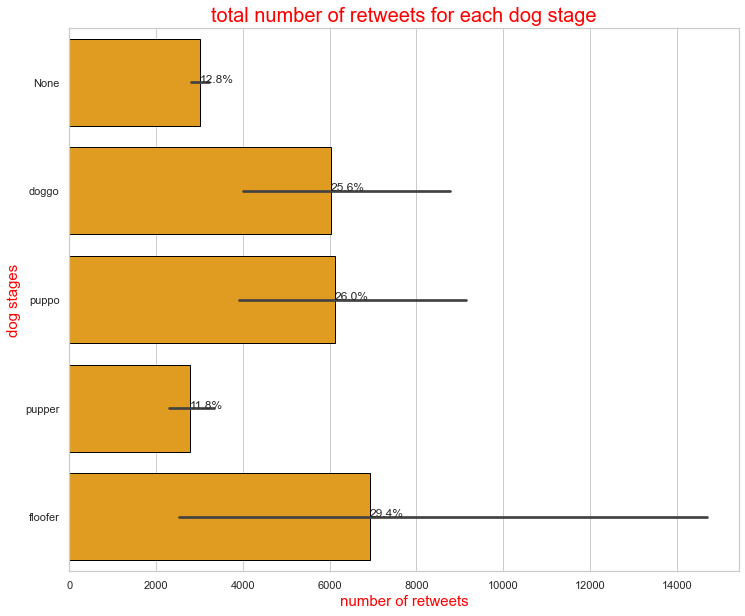

In [94]:
bar , ax = plt.subplots(figsize=(12,10))
ax = sns.barplot(data = dr_archive , x  = dr_archive['retweet_count'] , y =  dr_archive['dog_stage'], orient = 'h' , color = 'orange' , edgecolor = 'black'  )
plt.xlabel('number of retweets' , size = 15 , color = 'red')
plt.ylabel('dog stages', size = 15 , color = 'red')
plt.title('total number of retweets for each dog stage' , size = 20 , color = 'red')
#adding values to it's correct bar respectively 
total = len(dr_archive['dog_stage'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total/10)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


*Note: Many tweets does not specify the stage, unfortunatelly numbers might not show the real order*

### -From plot above, we conclude that puppo is on top of all stages in both retweet_counts and favorite_counts !


===========================================================

## 2- What's the most appeared amoung dog stage  ?

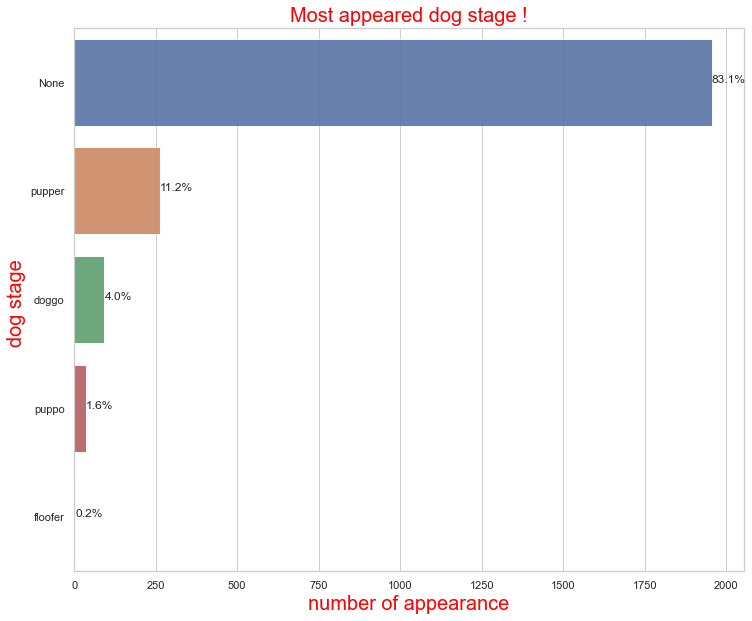

<Figure size 432x288 with 0 Axes>

In [96]:
counts_ds = dr_archive['dog_stage'].value_counts().head(10)
plt.figure(figsize=(12,10))
ax1 = sns.barplot(y = counts_ds.index , x = counts_ds.values, alpha=0.9)
plt.xlabel('number of appearance' , size = 20 , color = 'red')
plt.ylabel('dog stage ' , size = 20 , color = 'red')
plt.title("Most appeared dog stage !", size = 20 , color = 'red')

#adding values to it's correct bar respectively 
total = len(dr_archive['dog_stage'])
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax1.annotate(percentage, (x , y))
        
plt.show()

plt.savefig("Most appeared dog stage plot.png") #save as png


### From plot above, we conclude that the most frequent dog stage is on top with 11.2% frequencey !

===========================================================

## According to the three algorithms, what is the top 3 dog types ?

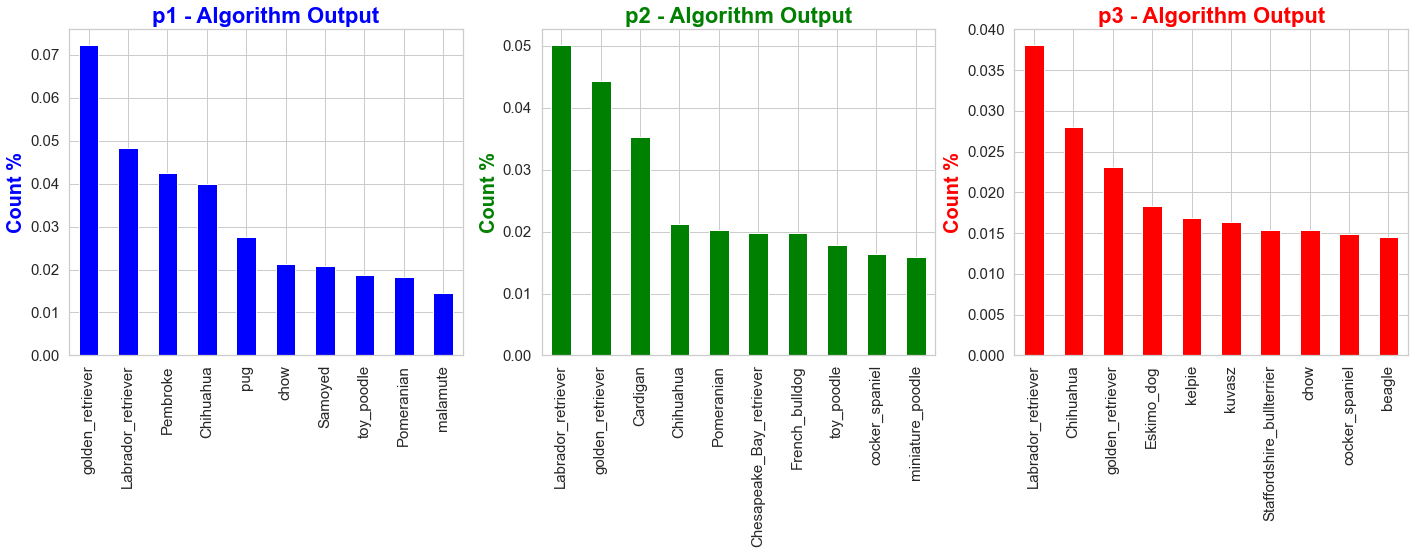

In [100]:
plt.figure(1)
plt.subplot(131)

dr_archive['p1'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0 , color = 'blue')
plt.title('p1 - Algorithm Output', fontweight="bold", fontsize = 22.0 , color = 'blue')
plt.ylabel('Count %', fontsize = 20, fontweight = 'bold' , color = 'blue')

plt.subplot(132)
dr_archive['p2'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0 , color = 'green')
plt.title('p2 - Algorithm Output', fontweight="bold", fontsize = 22.0 , color = 'green')
plt.ylabel('Count %', fontsize = 20 , fontweight = 'bold' , color = 'green')

plt.subplot(133)
dr_archive['p3'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0 , color = 'red')
plt.title('p3 - Algorithm Output', fontweight="bold", fontsize = 22.0 , color = 'red')
plt.ylabel('Count %', fontsize =20 ,fontweight = 'bold' , color = 'red')




plt.savefig("three algorithms plot.png") #save as png




### From plot of three algorithms above, we can see Majority of the predictions of the three algorithms are  ("golden_retriever" , "Labrador_retriever" and "Chihuahua dogs")


===========================================================

## ============================The End=====================================